In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [0]:
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)

X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [6]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

# (num_samples, width, height, RGB_channels)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32x32x3"
assert(X_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 32x32x3"

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1,     # fraction for percentage change, integer for num pixels change 
                   height_shift_range=0.1,              # fraction for percentage change, integer for num pixels change
                   zoom_range=0.2, 
                   shear_range=0.1,
                   rotation_range=10)
datagen.fit(X_train)

In [0]:
# batches = datagen.flow(X_train, y_train, batch_size=15)   # flowing of augmented data from generator in batches of 20
# X_batch, y_batch = next(batches)

# fig, axs = plt.subplots(nrows=1, ncols=15, figsize=(20,5))
# fig.tight_layout()

# for i in range(15):
#     axs[i].imshow(X_batch[i].reshape(32,32), cmap=plt.get_cmap("gray"))
#     axs[i].axis('off')

In [10]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

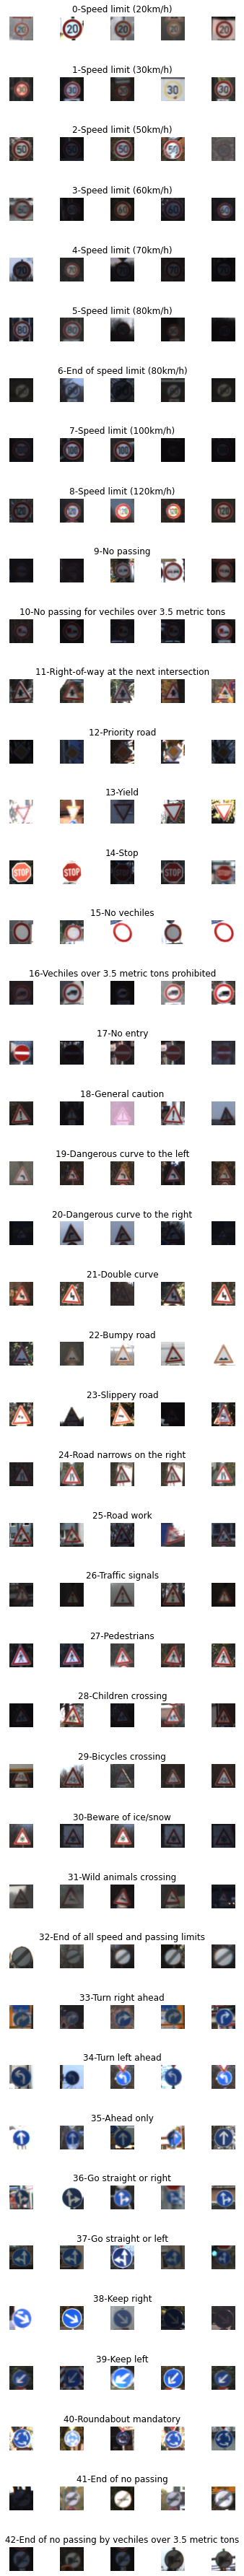

In [11]:
num_of_samples = []
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
        # (index, Series)
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)-1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + '-' + row['SignName'])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

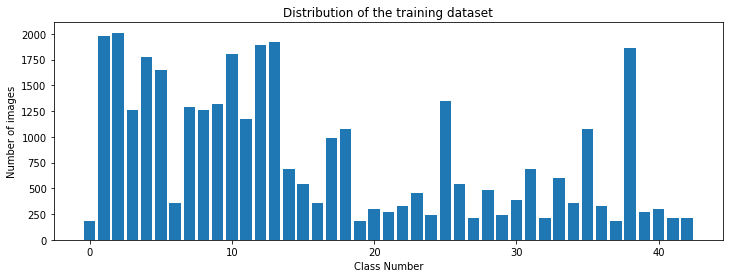

In [12]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of images")

(32, 32, 3)
36


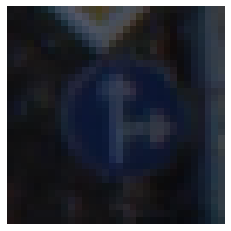

In [13]:
import cv2

sample_img = X_train[1000]
plt.imshow(sample_img)
plt.axis('off')
print(sample_img.shape)
print(y_train[1000])

(32, 32)


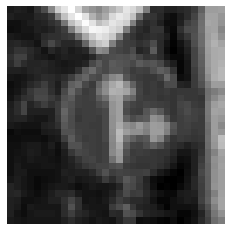

In [14]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

img = grayscale(sample_img)
plt.imshow(img, cmap=plt.get_cmap("gray"))
plt.axis('off')
print(img.shape)

(32, 32)


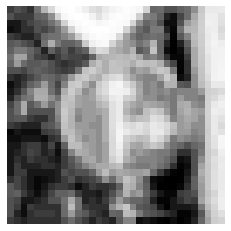

In [15]:
def equalize(img):
    img = cv2.equalizeHist(img)
    return img

img = equalize(img)
plt.imshow(img, cmap=plt.get_cmap("gray"))
plt.axis('off')
print(img.shape)

In [0]:
def preprocessing(img):
    img = grayscale(img)    # grayscale
    img = equalize(img)     # equalise histogram/intensities
    img = img/255           # normalise
    return img

X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


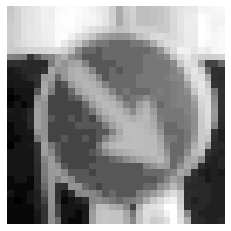

In [17]:
plt.imshow(X_train[random.randint(0, len(X_train)-1)], cmap=plt.get_cmap("gray"))
plt.axis('off')
print(X_train.shape)

In [0]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)

In [19]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [0]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [21]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(34799, 43)
(4410, 43)
(12630, 43)


In [0]:
def modified_model():
    model = Sequential()
    model.add(Conv2D(filters=60, kernel_size=(5,5), input_shape=(32,32,1), activation='relu'))
    model.add(Conv2D(filters=60, kernel_size=(5,5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=30, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(filters=30, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(units=500, activation='relu'))
    model.add(Dropout(0.5))    # added where the parameters are large, 0.5 is recommended
    model.add(Dense(units=num_classes, activation='softmax'))
    adam = Adam(lr=0.001)
    model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])
    print(model.summary())
    return model

In [23]:
model = modified_model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 480)              

In [24]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50), steps_per_epoch=2000, epochs=10, validation_data=(X_val, y_val), shuffle=1)
# history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val,y_val), batch_size=400, verbose=1, shuffle=1)

Epoch 1/10
2000/2000 [==============================] - 57s 29ms/step - loss: 0.8464 - accuracy: 0.7510 - val_loss: 0.1791 - val_accuracy: 0.9567
Epoch 2/10
2000/2000 [==============================] - 56s 28ms/step - loss: 0.2035 - accuracy: 0.9361 - val_loss: 0.0652 - val_accuracy: 0.9800
Epoch 3/10
2000/2000 [==============================] - 57s 28ms/step - loss: 0.1396 - accuracy: 0.9573 - val_loss: 0.0700 - val_accuracy: 0.9787
Epoch 4/10
2000/2000 [==============================] - 57s 28ms/step - loss: 0.1054 - accuracy: 0.9678 - val_loss: 0.0338 - val_accuracy: 0.9907
Epoch 5/10
2000/2000 [==============================] - 57s 28ms/step - loss: 0.0908 - accuracy: 0.9718 - val_loss: 0.0369 - val_accuracy: 0.9923
Epoch 6/10
2000/2000 [==============================] - 58s 29ms/step - loss: 0.0794 - accuracy: 0.9754 - val_loss: 0.0256 - val_accuracy: 0.9927
Epoch 7/10
2000/2000 [==============================] - 57s 29ms/step - loss: 0.0694 - accuracy: 0.9792 - val_loss: 0.0254 -

Text(0.5, 0, 'Epoch')

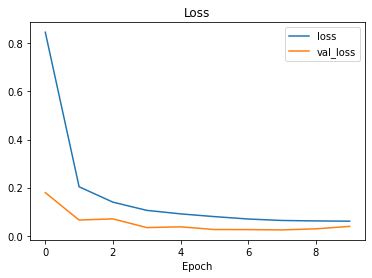

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

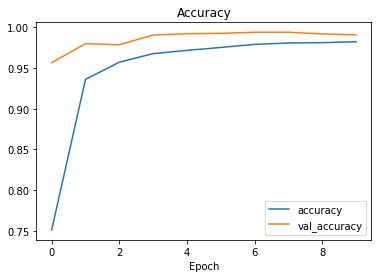

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')

In [27]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

Test score:  0.11393351269080423
Test accuracy:  0.972050666809082


<Response [200]>


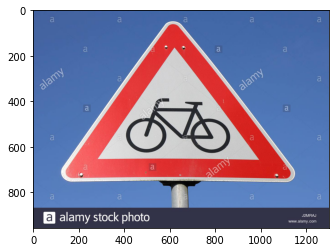

In [28]:
# Test Cases
# https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg
# https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg
# https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg
# https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg
# https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

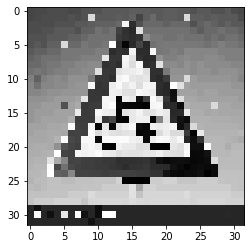

In [29]:
import cv2

img = np.asarray(img)
# print(img_array.shape)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap=plt.get_cmap("gray"))

In [0]:
img = img.reshape(1, 32, 32, 1)

In [31]:
print('Predicted Sign: ', str(model.predict_classes(img)))

Predicted Sign:  [25]
